[링크 텍스트](https://)<h1>Data load

In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
data_path = "./drive/MyDrive/wafer/wm811k/"
print(os.listdir(data_path))

['LSWMD.pkl', 'y_3000.npy', 'x_3000.npy', 'y_3500.npy', 'x_3500.npy', 'x_3500_128.npy', 'y_3500_128.npy']


In [8]:
x_3500 = np.load(data_path + "x_3500.npy")

<h1>DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
x_3500.shape

(3500, 3, 28, 28)

In [31]:
points = np.zeros((28 * 28 , 2))
p = 0;

label_idx = 0

for i in range(28):
  for j in range(28):
    if x_3500[label_idx][2][i][j] == 1:
      points[p][0] = i
      points[p][1] = j
      p += 1

points = points[:p]
# points

In [51]:
db = DBSCAN(eps=2, min_samples=4).fit(points)

eps가 2이고, min_samples가 4의 의미

= 거리가 2인 점들이 4개이상 있으면 군집의 하나로 친다. 

In [52]:
db.labels_

array([-1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1,  2,  2, -1, -1, -1, -1,  2,  2, -1,
       -1, -1, -1, -1, -1, -1,  3, -1,  4,  3, -1,  3,  3, -1,  4,  4,  4])

In [53]:
img = np.zeros((28, 28))

for (i, j), l in zip(points, db.labels_):
  img[int(i),int(j)] = (l + 2)

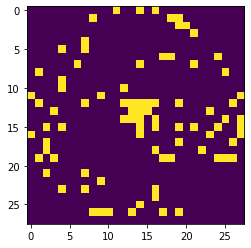

In [54]:
plt.imshow(np.transpose(x_3500[label_idx][2]))

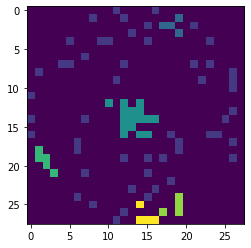

In [55]:
plt.imshow(img)